<a href="https://colab.research.google.com/github/saman-nia/MultiClass-Classification/blob/master/Multi_Class(One_vs_all).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install TF 2.0 Alpha
!pip install tf-nightly-gpu-2.0-preview

In [2]:
import tensorflow as tf
print('Check the Version of TF: ', tf.__version__)

2.0.0-dev20190420


In [0]:
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#--------------------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#--------------------------------------------------------------
from IPython.display import clear_output

In [0]:
# Fetch Dataset from Github:
url_data = 'https://raw.githubusercontent.com/saman-nia/Multi-label-Text-Classification-Features-with-Tensorflow/master/data/data_set.csv'
data = pd.read_csv(url_data).dropna()
# Dataset is now stored in a Pandas Dataframe

In [5]:
data.head()

,id,name,description,price,shop,brand,labels
0,88136,Herren Schiesser Shirt 2er Pack ohne Arm unifa...,Shirt 2er Pack - American T-Shirts von Schiess...,22.000000,Herrenausstatter,Schiesser,"Bekleidung,Shirts,T-Shirts,Wäsche,Unterhemden,..."
1,88247,Herren bruno banani Hipshorts Swim rot,Trendige Bademode bei Herrenausstatter: Swim B...,23.950001,Herrenausstatter,Bruno Banani,"Bekleidung,Bademode,Badehosen,Bade Pants,Hosen..."
2,323683,Herren bruno banani Hipshorts Magical schwarz ...,Magical - die Serie aus Microfaser mit Elastha...,16.950001,Herrenausstatter,Bruno Banani,"Bekleidung,Hosen,Kurze Hosen,Shorts,Wäsche,Unt..."
3,390726,MIA PlateauSandalette schwarz,Vagabond MIA PlateauSandalette schwarz: WOW - ...,74.950000,Zalando,Vagabond,"Schuhe,Plateau Schuhe,Plateau Sandaletten,Sand..."
4,986780,Herren bruno banani Happy You V-Shirt schw. ge...,Happy U - V-Shirt aus elastischer Microfaser v...,29.950001,Herrenausstatter,Bruno Banani,"Bekleidung,Shirts,T-Shirts,V-Shirts,Wäsche,Unt..."


In [6]:
data.shape

(25879, 7)

In [0]:
# Convert category feature to string for extract text
data['name'] = data.name.astype('str')
data['description'] = data.description.astype('str')
data['brand'] = data.brand.astype('str')

In [0]:
# Get raw text from products
txt = data[['name', 'description', 'brand']].apply(lambda x: ' '.join(x),
                                                   axis=1)

In [0]:
# Get all level tags for each product
y = data['labels'].apply(lambda x: set(x.split(','))) # split the tags in each row

In [0]:
# Split the data between training and test set
txt_train, txt_test, y_train, y_test = train_test_split(txt, y, test_size=0.3, 
                                                        random_state=112358)

In [11]:
# Create a word vectorizer, and train it on the text of the training set
# Get the vectorized training set text as output
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(txt_train)
print("\nNumber of text features: %s" % X_train.shape[1])


Number of text features: 41470


In [0]:
# Vectorize the test set text
X_test = vectorizer.transform(txt_test)

In [0]:
# One-hot encoder for the product tags
label_binarizer = MultiLabelBinarizer().fit(y)

In [14]:
# convert the training and test set tags
y_train_bin = label_binarizer.transform(y_train)
y_test_bin = label_binarizer.transform(y_test)
print("Number of tags: %s" % y_train_bin.shape[1])

Number of tags: 612


**Build Machine Learning Model by LogisticRegression**


In [15]:
# Create a one-versus-rest classifier for out multi-output problem
print("Machine Learning model is in the training process... ")
model = OneVsRestClassifier(LogisticRegression(), n_jobs=-1).fit(X_train.tocoo()
                                                                 , y_train_bin)
# Measure the accuracy of your model
accuracyMLmodel = metrics.accuracy_score(y_test_bin, model.predict(X_test))
clear_output()
print("\nThe accuracy of Machine Learning model is %.1f%%" % (100 * accuracyMLmodel))


The accuracy of Machine Learning model is 19.5%


In [0]:
# Find the geometric progression value to set the hidden layer.
output_layer = y_train_bin.shape[1]
x = [2**i for i in range(2, 20)]
for j in range(len(x)):
  if x[j] > output_layer:
    Hidden_layer = (x[j])
    break

In [0]:
input_layer = X_train.shape[1]
hidden_layer = Hidden_layer

In [19]:
X_train.shape

(18115, 41470)

In [20]:
print('Input Layer Nodes are: ------>', input_layer)
print('Hidden Layer Nodes are: ----->', hidden_layer)
print('Output Layer Nodes are: ----->', output_layer)

Input Layer Nodes are: ------> 41470
Hidden Layer Nodes are: -----> 1024
Output Layer Nodes are: -----> 612


In [0]:
n_epoch = 5
batch_size = 64
csv_logger = tf.keras.callbacks.CSVLogger('training.log')

**Build Deep Learning Model by Sigmoid Function and Binary Crossentropy Lossing Function**


In [0]:
modelTF = tf.keras.models.Sequential()
modelTF.add(tf.keras.layers.Dense(hidden_layer, input_dim = input_layer, activation='tanh')) # hidden layer
modelTF.add(tf.keras.layers.Dense(output_layer, activation='sigmoid')) # output layer
# I use (sigmoid + binary_crossentropy) to encounter text topic multi-label
modelTF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
modelTF.fit(X_train.toarray(), y_train_bin, batch_size = batch_size, callbacks=[csv_logger],
            epochs = n_epoch, validation_data=(X_test.toarray(), y_test_bin))

Train on 18115 samples, validate on 7764 samples
Epoch 1/5
18115/18115 [==============================] - 10s 553us/sample - loss: 0.0596 - accuracy: 0.9875 - val_loss: 0.0240 - val_accuracy: 0.9933
Epoch 2/5
18115/18115 [==============================] - 9s 501us/sample - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0173 - val_accuracy: 0.9946
Epoch 3/5
18115/18115 [==============================] - 9s 497us/sample - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0154 - val_accuracy: 0.9951
Epoch 4/5
18115/18115 [==============================] - 9s 503us/sample - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0148 - val_accuracy: 0.9954
Epoch 5/5
18115/18115 [==============================] - 9s 505us/sample - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0151 - val_accuracy: 0.9955


In [0]:
log_rec = pd.read_csv('training.log')
log_rec['accuracy'] = round(log_rec.accuracy * 100, 2)
log_rec['loss'] = round(log_rec.loss, 3)
log_rec['val_accuracy'] = round(log_rec.val_accuracy * 100, 2)
log_rec['val_loss'] = round(log_rec.val_loss, 3)

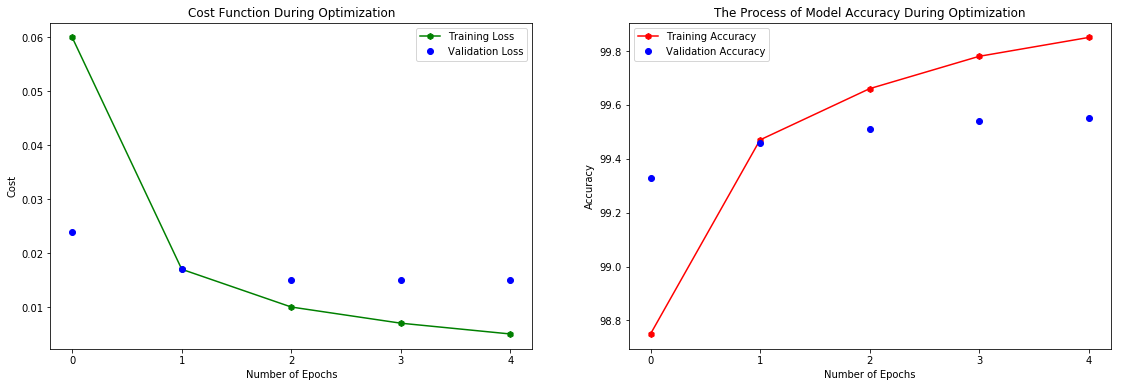

In [25]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
plt.plot(log_rec['epoch'], log_rec['loss'], 'g', label='Training Loss', marker='h')
plt.plot(log_rec['epoch'], log_rec['val_loss'], 'bo', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')
plt.xticks(log_rec['epoch'])
plt.title('Cost Function During Optimization')
plt.legend()
plt.subplot(1,2,2)
plt.plot(log_rec['epoch'], log_rec['accuracy'], 'r', label='Training Accuracy', marker='h')
plt.plot(log_rec['epoch'], log_rec['val_accuracy'], 'bo', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.xticks(log_rec['epoch'])
#plt.yticks(log_rec['accuracy'])
plt.title('The Process of Model Accuracy During Optimization')
plt.legend()
plt.show()

In [38]:
print("\nThe accuracy of Machine Learning model is ------> %.1f%%" % (100 * accuracyMLmodel))
print("\nThe accuracy of Deep Learning model is ---------> %.1f%%" % (log_rec['val_accuracy'][n_epoch-1]))


The accuracy of Machine Learning model is ------> 19.5%

The accuracy of Deep Learning model is ---------> 99.5%
